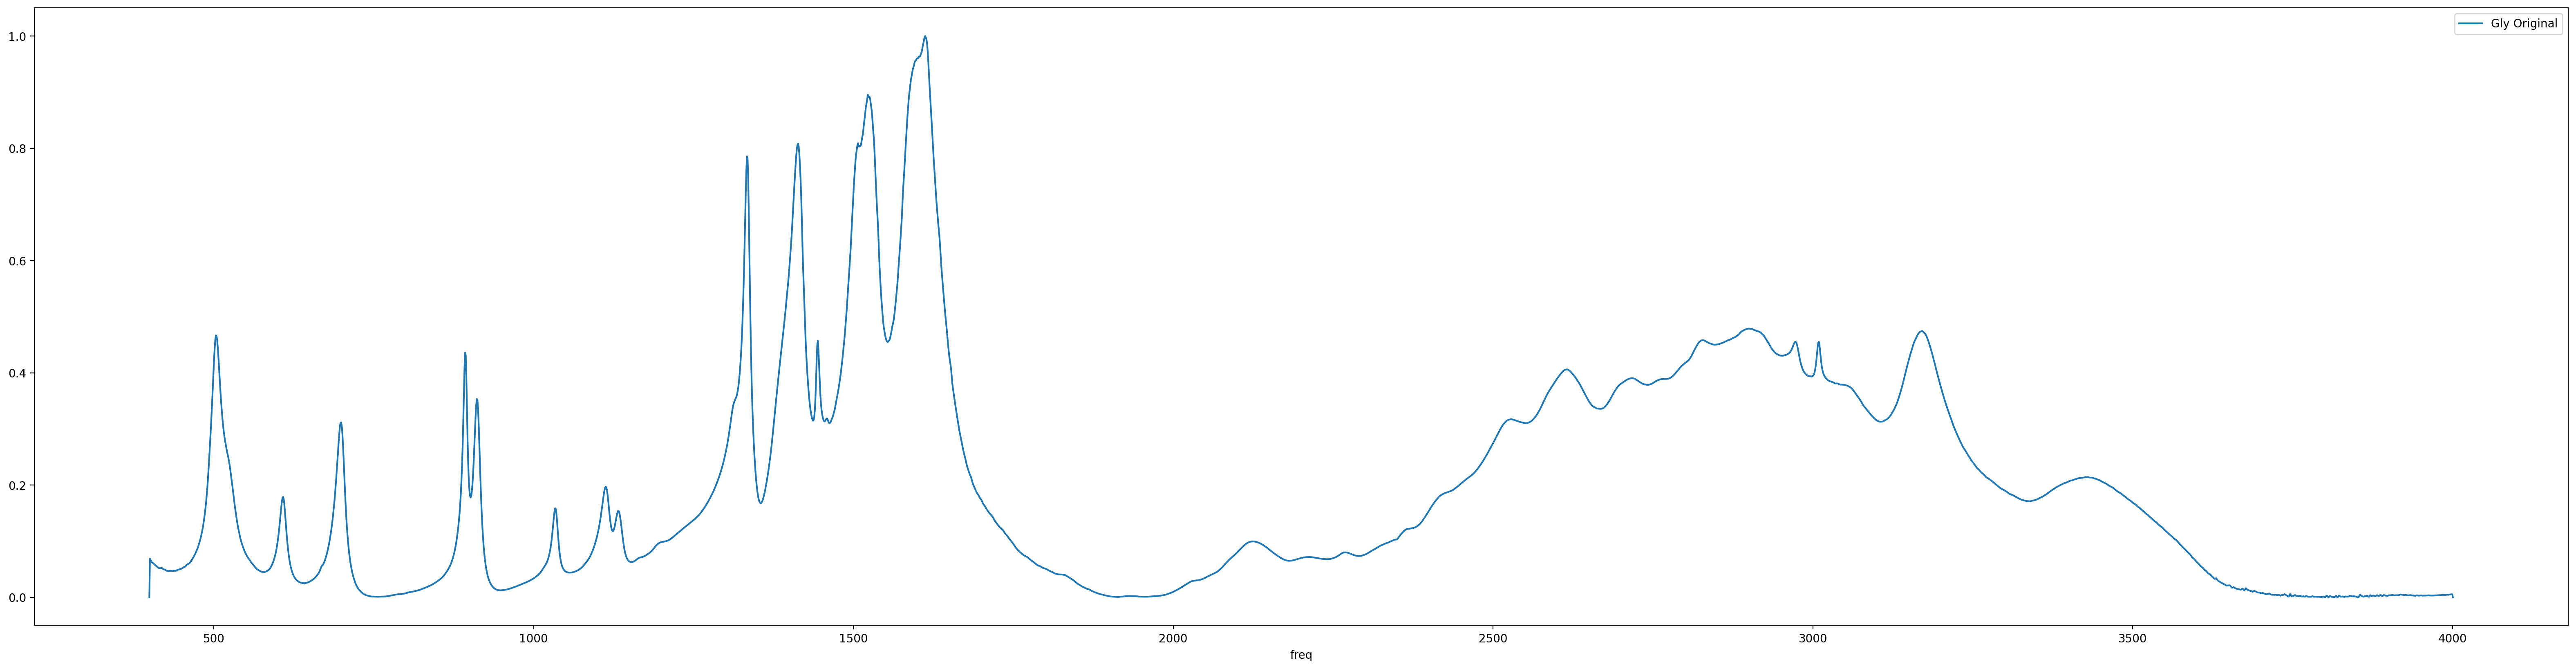

In [13]:
# %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

headers = ['freq', 'Gly Original']
df = pd.read_csv('Глицин Fluka.CSV', names=headers)
df.set_index('freq').plot()

plt.rcParams['figure.figsize'] = [40, 10]
plt.rcParams['figure.dpi'] = 200

plt.show()

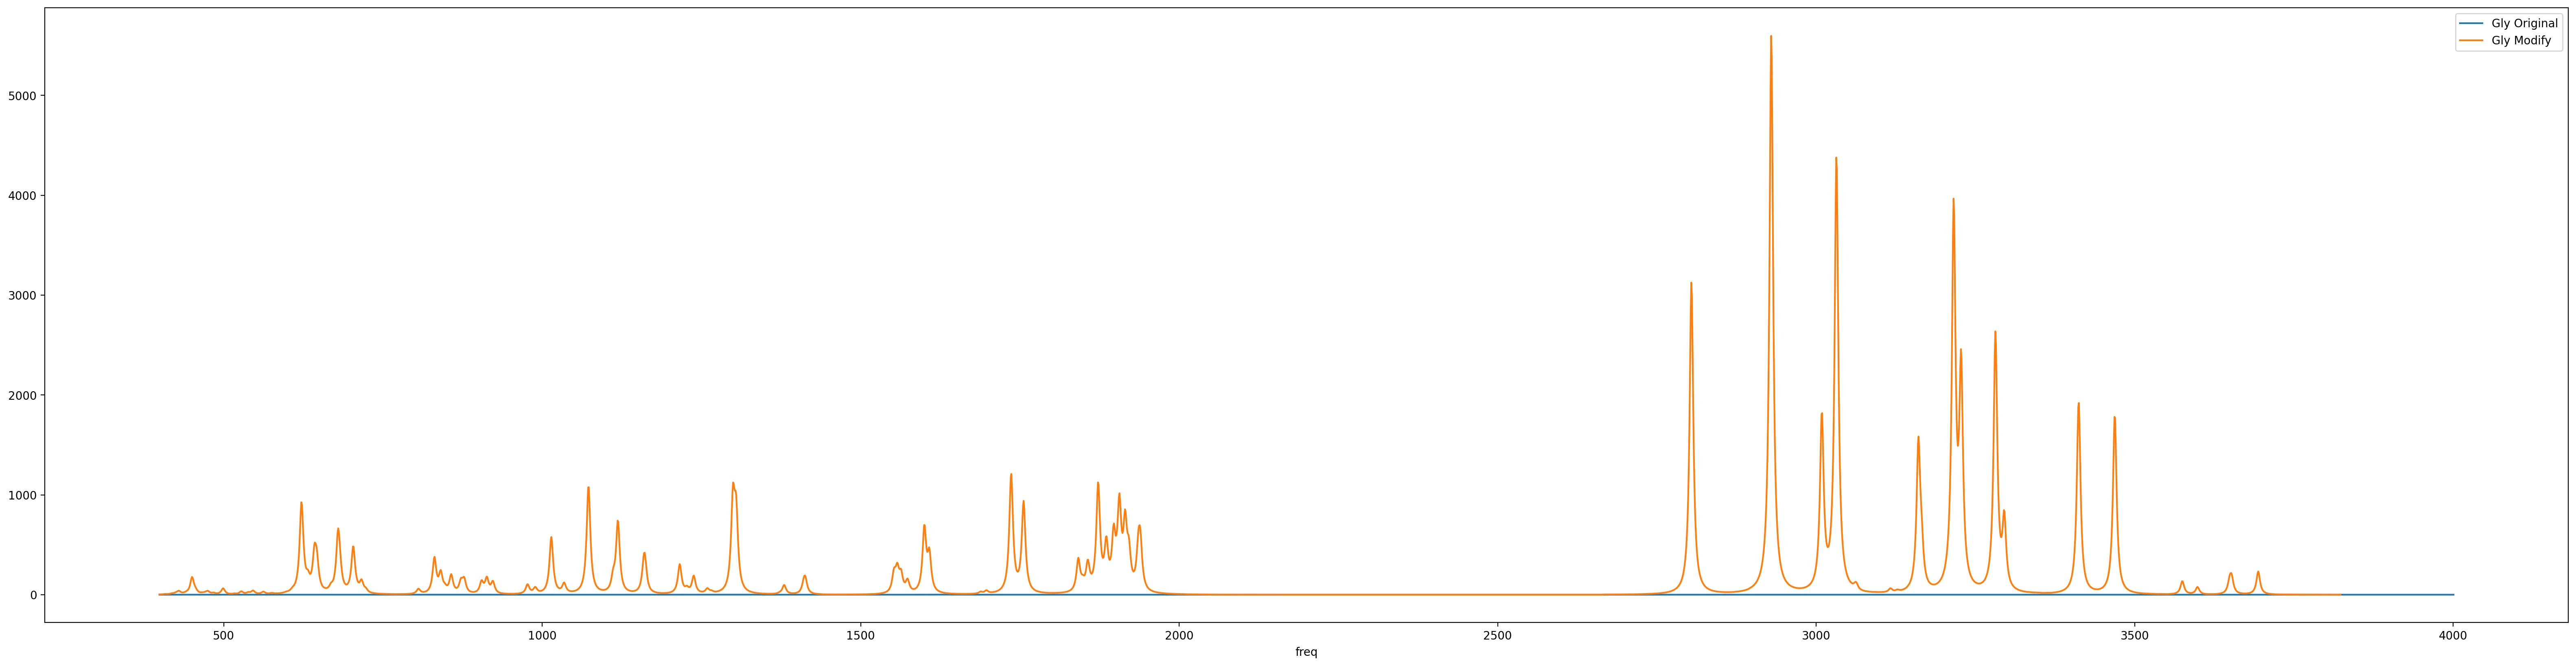

nan

In [166]:
#  %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

headers1 = ['freq', 'Gly Original']
headers2 = ['freq', 'Gly Modify']
df1 = pd.read_csv('Глицин модифиц.CSV', names=headers1)
df2 = pd.read_csv('2ZwGLY_6water_freq_ir2.txt', names=headers2)

df1['Gly Modify'] = df2.get('Gly Modify')
df1['Gly Modify'] = df1.get('Gly Modify')
df1.set_index('freq').plot()

plt.rcParams['figure.figsize'] = [40, 10]
plt.rcParams['figure.dpi'] = 200

plt.show()
df1.get('Gly Modify').array[3720]

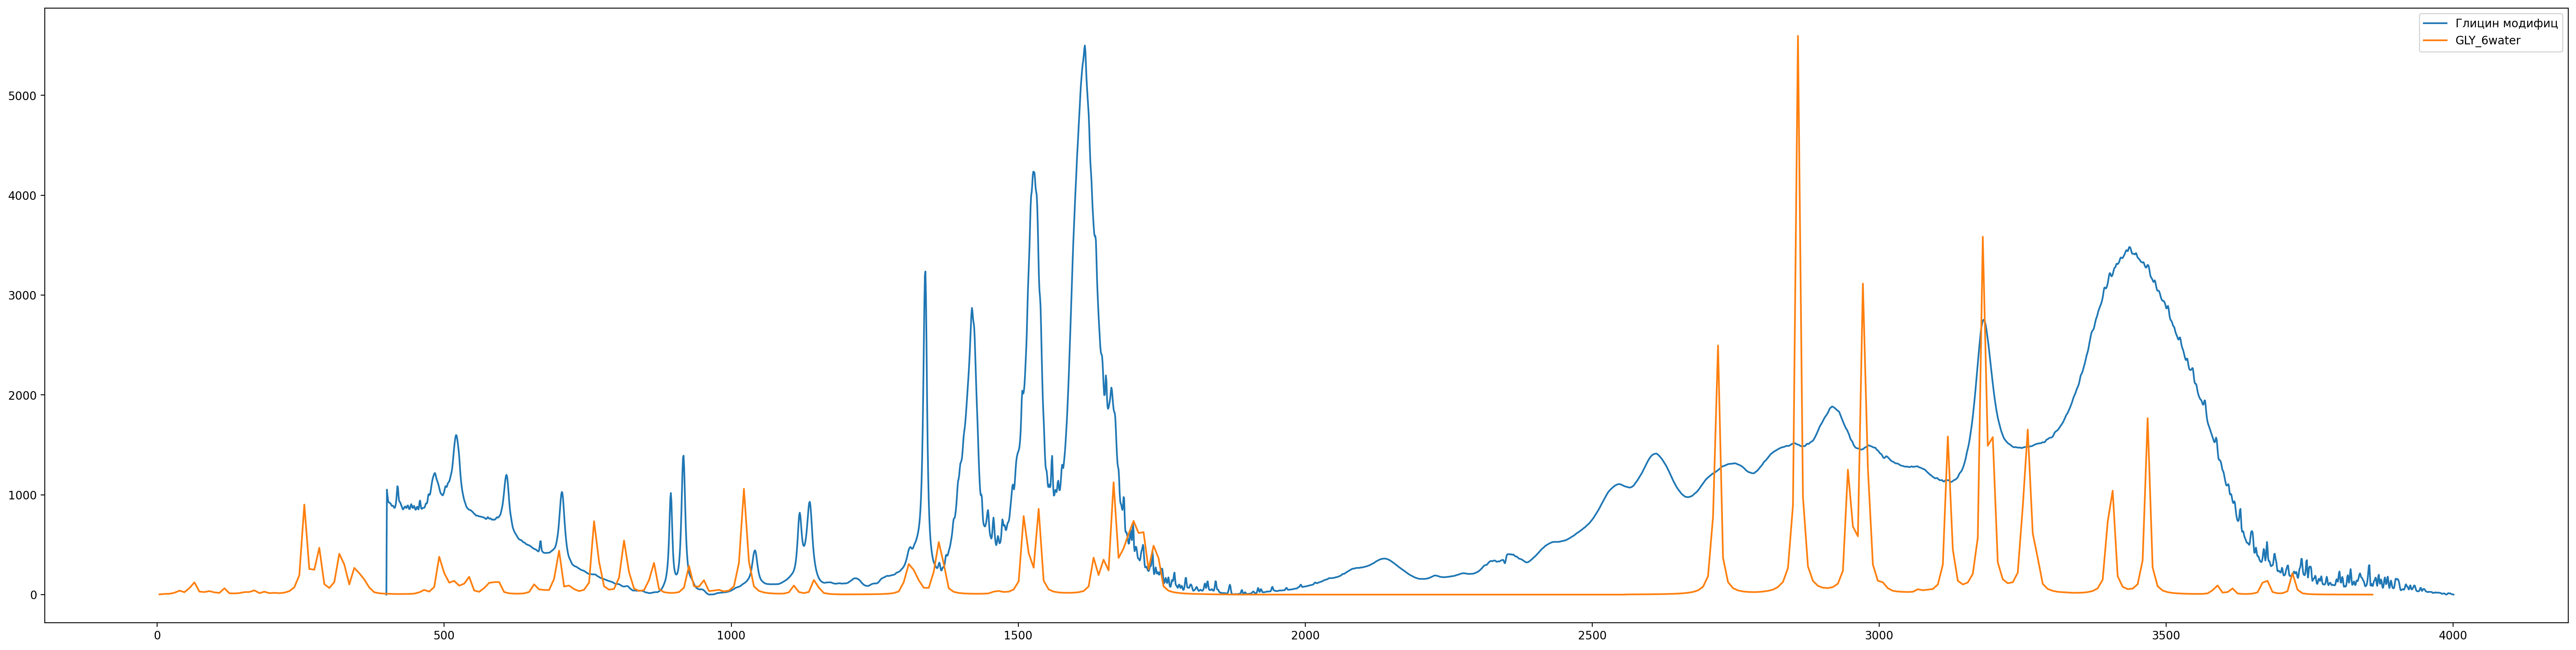

In [74]:
#  %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

headers1 = ['freq', 'Gly Original']
headers2 = ['freq', 'Gly Modify']
df1 = pd.read_csv('Глицин модифиц.CSV', names=headers1)
df2 = pd.read_csv('2ZwGLY_6water_freq_ir.txt', names=headers2)

x1 = df1['freq']
y1 = df1['Gly Original'] * 5500
x2 = df2['freq']
y2 = df2['Gly Modify']
plt.plot(x1, y1)
plt.plot(x2 * 0.967, y2)
plt.legend(['Глицин модифиц', 'GLY_6water'])
plt.rcParams['figure.figsize'] = [40, 10]
plt.rcParams['figure.dpi'] = 200

plt.show()


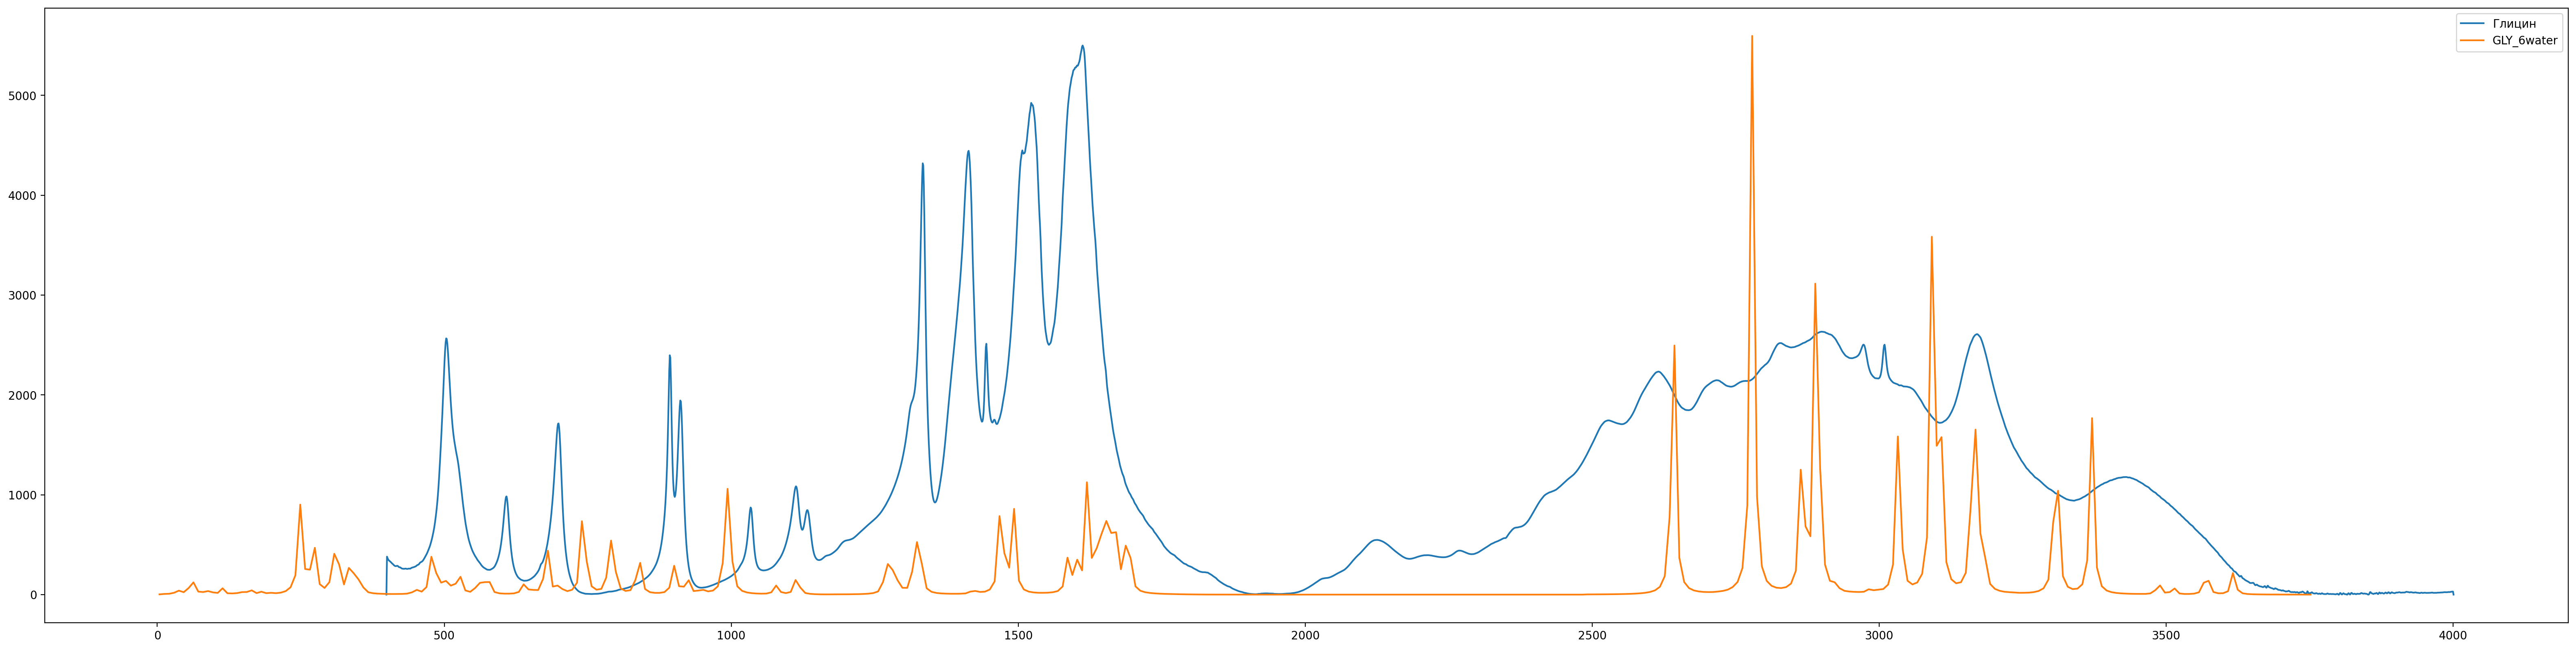

In [69]:
#  %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

headers1 = ['freq', 'Gly Original']
headers2 = ['freq', 'Gly Modify']
df1 = pd.read_csv('Глицин Fluka.CSV', names=headers1)
df2 = pd.read_csv('2ZwGLY_6water_freq_ir.txt', names=headers2)

x1 = df1['freq']
y1 = df1['Gly Original'] * 5500
x2 = df2['freq']  #.map(lambda x: )
y2 = df2['Gly Modify']
plt.plot(x1, y1)
plt.plot(x2 * 0.94, y2)
plt.legend(['Глицин', 'GLY_6water'])
plt.rcParams['figure.figsize'] = [40, 10]
plt.rcParams['figure.dpi'] = 200

plt.show()

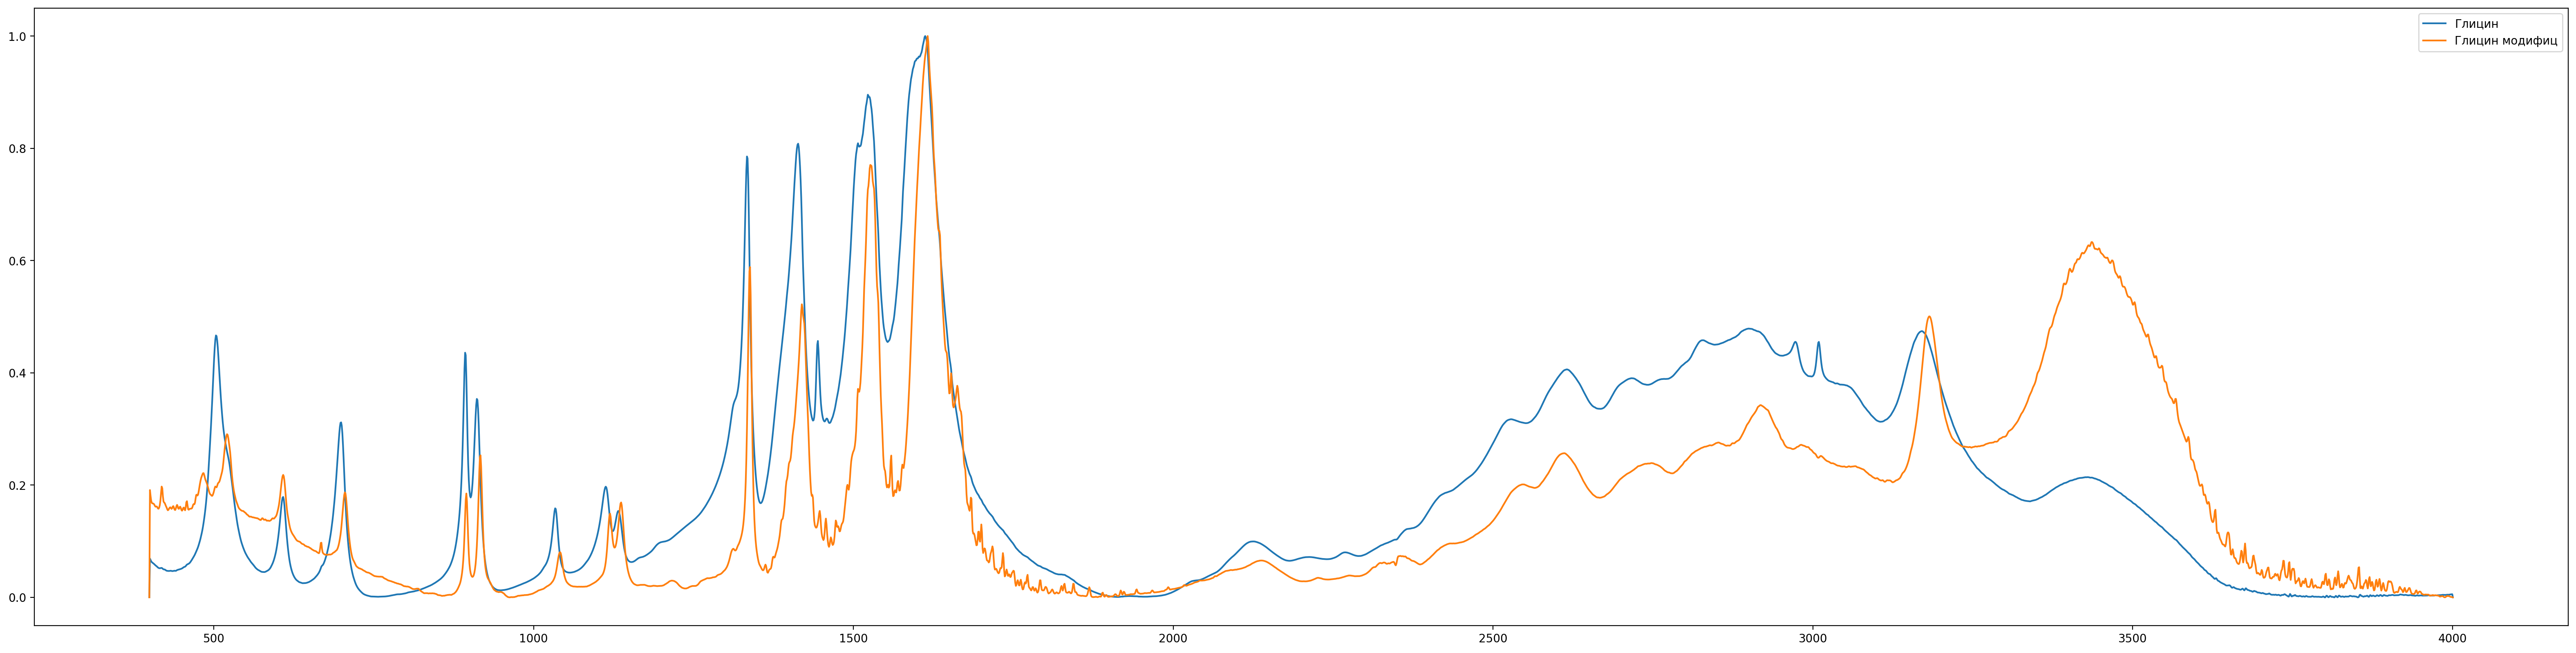

In [52]:
#  %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

headers1 = ['freq', 'Gly Original']
headers2 = ['freq', 'Gly Modify']
df1 = pd.read_csv('Глицин Fluka.CSV', names=headers1)
df2 = pd.read_csv('Глицин модифиц.CSV', names=headers2)

x1 = df1['freq']
y1 = df1['Gly Original']
x2 = df2['freq']  #.map(lambda x: )
y2 = df2['Gly Modify']
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.legend(['Глицин', 'Глицин модифиц'])
plt.rcParams['figure.figsize'] = [40, 10]
plt.rcParams['figure.dpi'] = 200

plt.show()

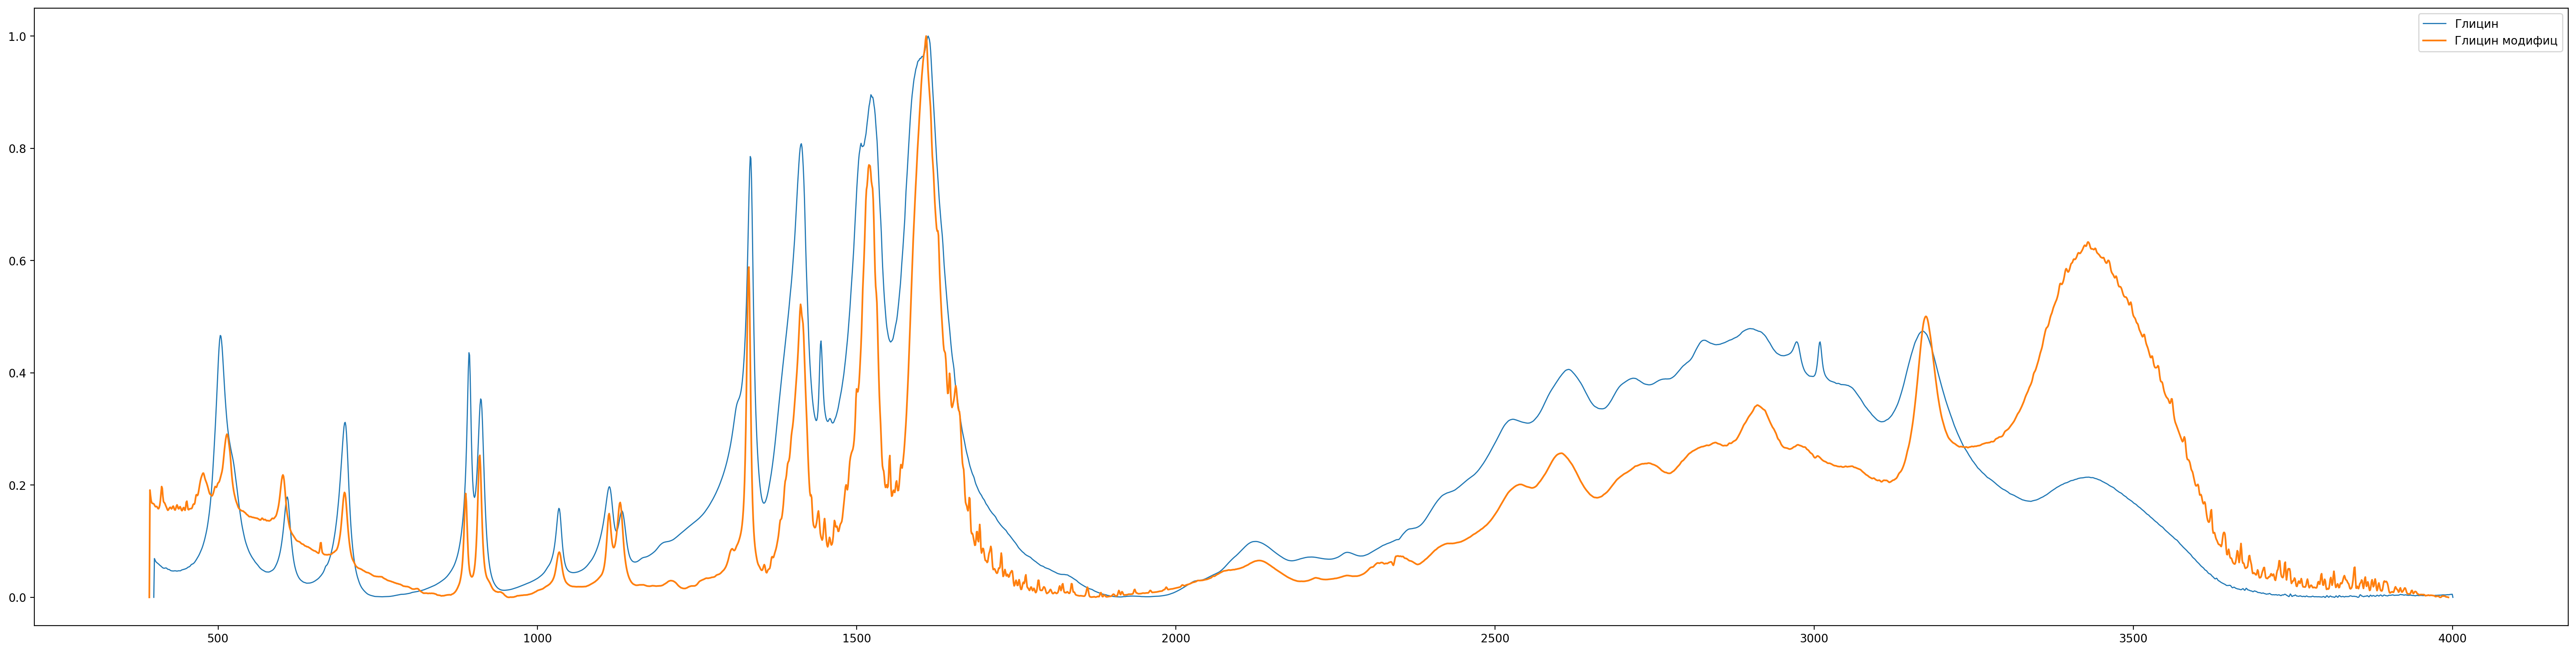

In [68]:
#  %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import peakutils

headers1 = ['freq', 'Gly Original']
headers2 = ['freq', 'Gly Modify']
df1 = pd.read_csv('Глицин Fluka.CSV', names=headers1)
df2 = pd.read_csv('Глицин модифиц.CSV', names=headers2)

x1 = df1['freq']
y1 = df1['Gly Original']
x2 = df2['freq']  #.map(lambda x: )
y2 = df2['Gly Modify']
plt.plot(x1, y1, lw=1, alpha=1)
plt.plot(x2, y2)

index = peakutils.indexes(y2, thres=0.2, min_dist=40)
# plt.plot(x2[index],y2[index], marker="o", ls="", ms=15 )

plt.legend(['Глицин', 'Глицин модифиц'])
plt.rcParams['figure.figsize'] = [40, 10]
plt.rcParams['figure.dpi'] = 200

plt.show()

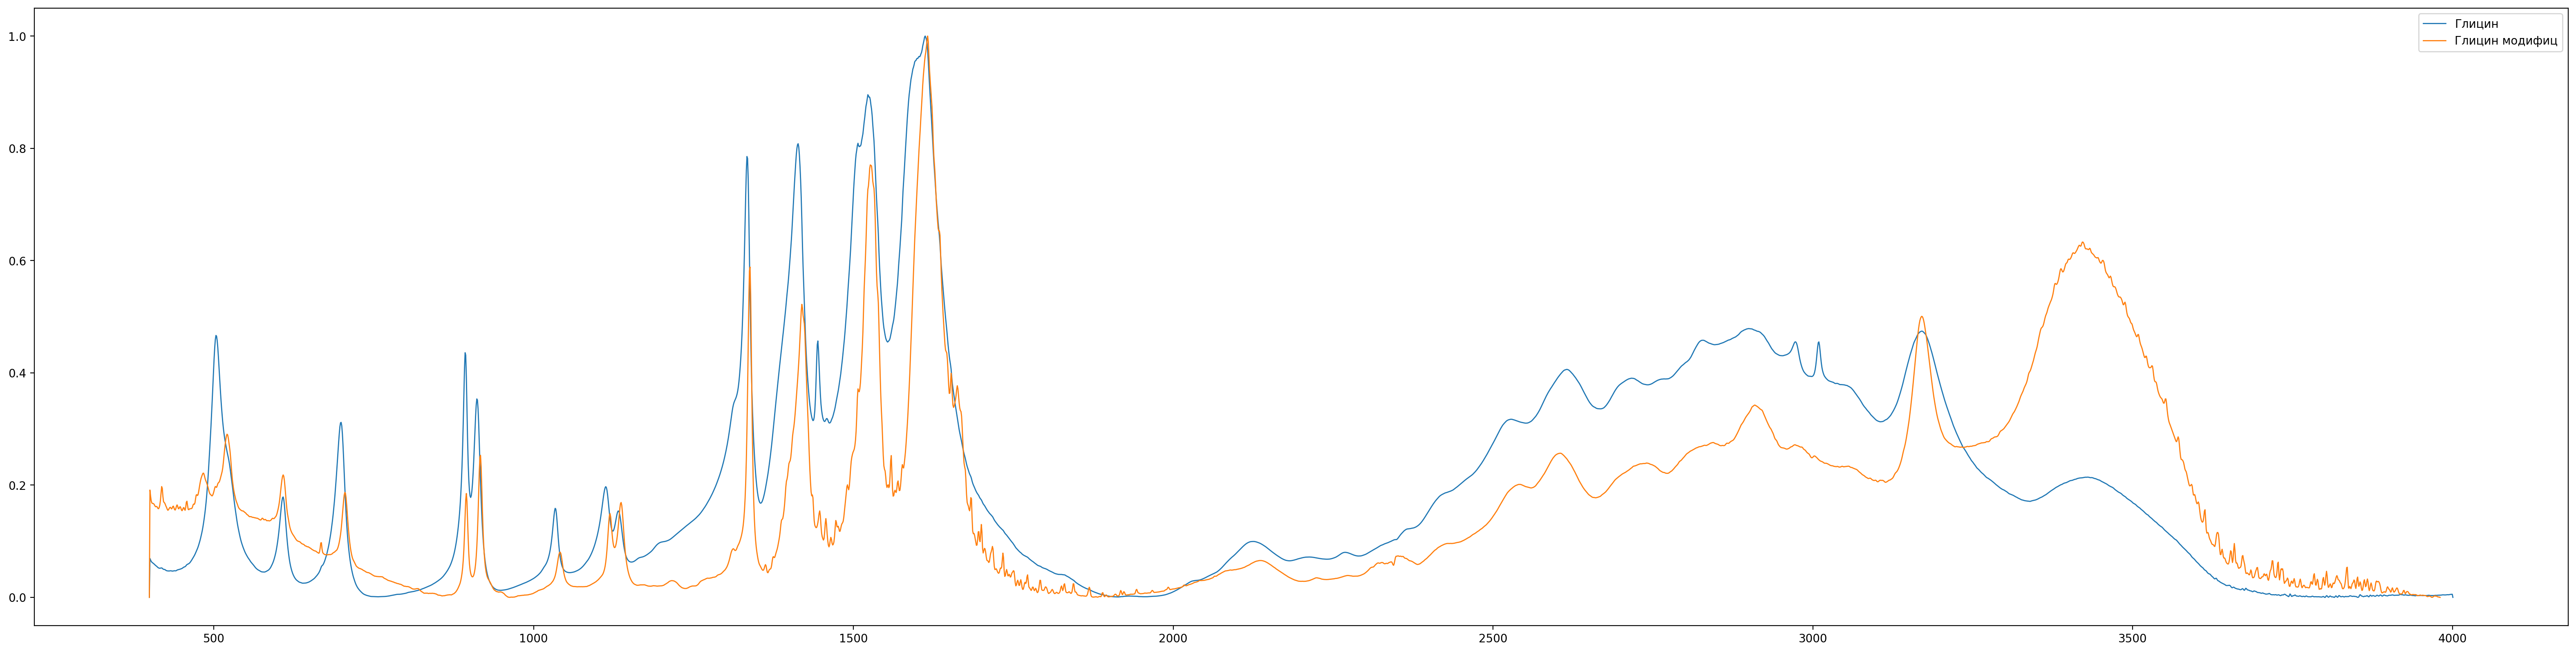

In [25]:
#  %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import peakutils


def do_anharmonism_correction(x):
    if x > 2000:
        temp = x
        x = x - 2000
        x = (x * 0.99) + 2000
    return x


headers1 = ['freq', 'Gly Original']
headers2 = ['freq', 'Gly Modify']
df1 = pd.read_csv('Глицин Fluka.CSV', names=headers1)
df2 = pd.read_csv('Глицин модифиц.CSV', names=headers2)

x1 = df1['freq']
y1 = df1['Gly Original']
x2 = df2['freq'].map(lambda x: do_anharmonism_correction(x))
y2 = df2['Gly Modify']
plt.plot(x1, y1, lw=1, alpha=1)
plt.plot(x2, y2, lw=1, alpha=1)
index = peakutils.indexes(y2, thres=0.2, min_dist=40)
# plt.plot(x2[index],y2[index], marker="o", ls="", ms=15 )

plt.legend(['Глицин', 'Глицин модифиц'])
plt.rcParams['figure.figsize'] = [40, 10]
plt.rcParams['figure.dpi'] = 200

plt.show()


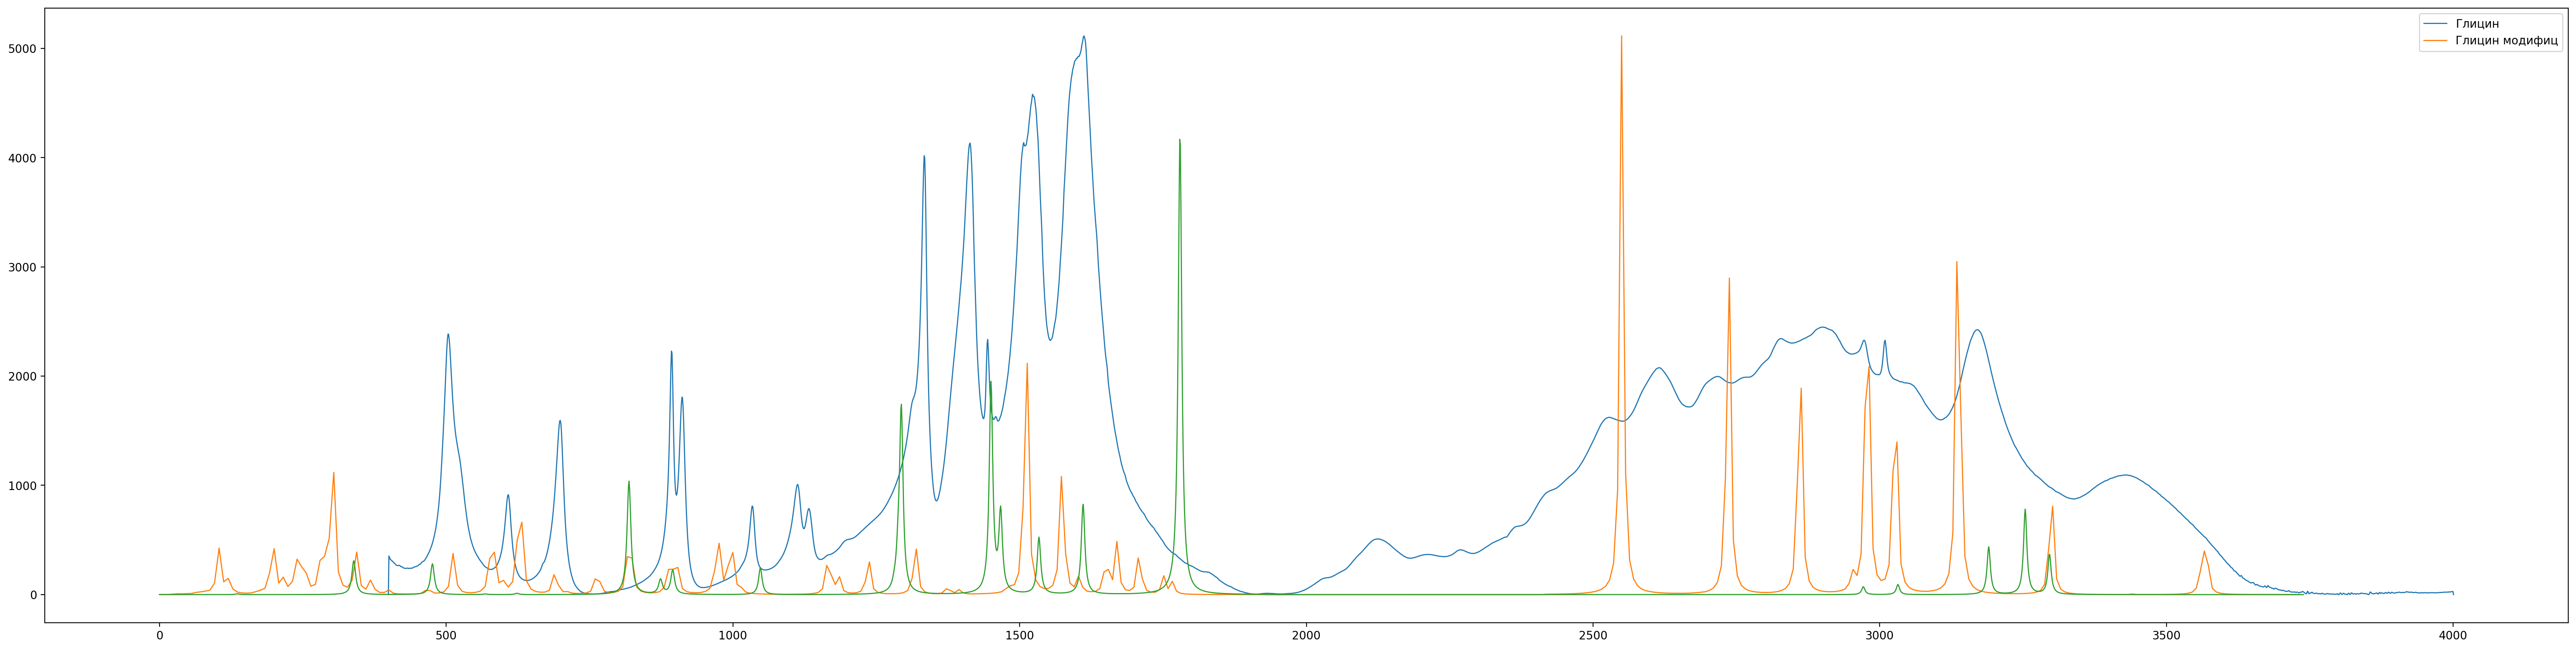

In [58]:
#  %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import peakutils


def do_anharmonism_correction(x):
    if 1000 < x < 2000:
        x = x - 1000
        x = (x * 0.93) + 1000
    elif x > 2000:
        x = x - 2000
        x = (x * 0.92) + 2000
    return x


headers1 = ['freq', 'Gly Original']
headers2 = ['freq', 'Gly Modify']
df1 = pd.read_csv('Глицин Fluka.CSV', names=headers1)
df2 = pd.read_csv('zwitterion_solv_ir.txt', names=headers2)
df3 = pd.read_csv('zwitterion_glycine_ir2.txt', names=headers2)

x1 = df1['freq']
y1 = df1['Gly Original'] * df2['Gly Modify'].max()
x2 = df2['freq'].map(lambda x: do_anharmonism_correction(x))
y2 = df2['Gly Modify']

x3 = df3['freq'].map(lambda x: do_anharmonism_correction(x))
y3 = df3['Gly Modify']*3

plt.plot(x1, y1, lw=1, alpha=1)
plt.plot(x2, y2, lw=1, alpha=1)
plt.plot(x3, y3, lw=1, alpha=1)
index = peakutils.indexes(y2, thres=0.2, min_dist=40)
# plt.plot(x2[index],y2[index], marker="o", ls="", ms=15 )

plt.legend(['Глицин', 'Глицин модифиц'])
plt.rcParams['figure.figsize'] = [40, 10]
plt.rcParams['figure.dpi'] = 200

plt.show()

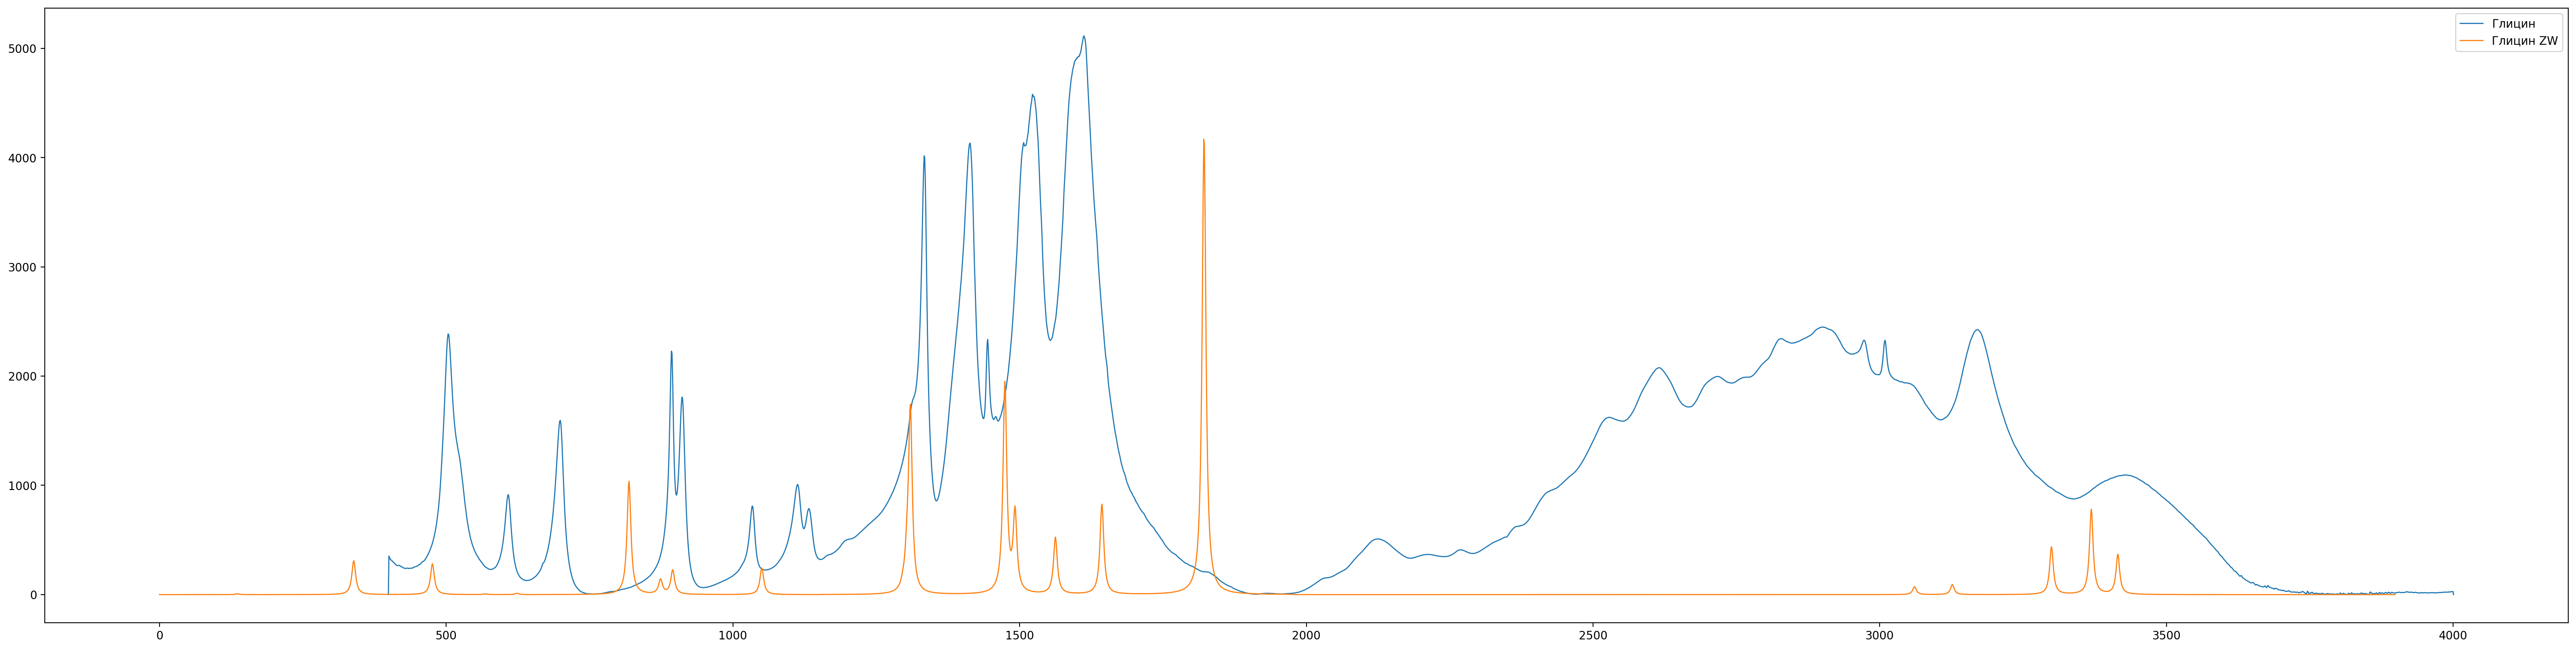

In [76]:
#  %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import peakutils


def do_anharmonism_correction(x):
    if 1000 < x < 2000:
        x = x - 1000
        x = (x * 0.98) + 1000
    elif x > 2000:
        x = x - 2000
        x = (x * 0.95) + 2000
    return x


headers1 = ['freq', 'Gly Original']
headers2 = ['freq', 'Gly Modify']
df1 = pd.read_csv('Глицин Fluka.CSV', names=headers1)
df2 = pd.read_csv('zwitterion_solv_ir.txt', names=headers2)
df3 = pd.read_csv('zwitterion_glycine_ir2.txt', names=headers2)
df4 = pd.read_csv('2ZwGLY_6water_freq_ir2.txt', names=headers2)
df5 = pd.read_csv('2zw_GLy_2ver_freq_ir.txt', names=headers2)

x1 = df1['freq']
y1 = df1['Gly Original'] * df2['Gly Modify'].max()
x2 = df2['freq'].map(lambda x: do_anharmonism_correction(x))
y2 = df2['Gly Modify']

x3 = df3['freq'].map(lambda x: do_anharmonism_correction(x))
y3 = df3['Gly Modify']*3

x4 = df4['freq'].map(lambda x: do_anharmonism_correction(x))
y4 = df4['Gly Modify']

x5 = df5['freq'].map(lambda x: do_anharmonism_correction(x))
y5 = df5['Gly Modify']

plt.plot(x1, y1, lw=1, alpha=1)
# plt.plot(x2, y2, lw=1, alpha=1)
plt.plot(x3, y3, lw=1, alpha=1)
# plt.plot(x4, y4, lw=1, alpha=1)
# plt.plot(x5, y5, lw=1, alpha=1)
index = peakutils.indexes(y2, thres=0.2, min_dist=40)
# plt.plot(x2[index],y2[index], marker="o", ls="", ms=15 )

plt.legend(['Глицин',  'Глицин ZW + Вода', 'Глицин ZW', '2Глицин ZW + 6Вода', '2Глицин ZW'])
plt.legend(['Глицин',  'Глицин ZW'])
plt.rcParams['figure.figsize'] = [40, 10]
plt.rcParams['figure.dpi'] = 200

plt.show()